# General

In [1]:
!nvidia-smi

Sun Dec 25 17:48:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/ffyyytt/GPU_Project.git
%cd /content/GPU_Project/source
!bash make.cmd

Cloning into 'GPU_Project'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 150 (delta 52), reused 109 (delta 23), pack-reused 0
Receiving objects: 100% (150/150), 8.88 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/GPU_Project/source
main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated

main.cu(8): warning: conversion from a string literal to "char *" is deprecated



In [3]:
import os
import cv2
import math
import hashlib
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import *

plt.rcParams['figure.figsize'] = [15, 16]

In [4]:
def timeCapture(cmd, times = 1):
    return [float(os.popen(cmd).read().strip()) for i in range(times)]

In [5]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def readImage(file):
    return cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)

def getVisualize(file, bins = list(range(257))):
    image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2HSV)
    hist = np.histogram(image[:,:,2].flatten(), bins=bins)[0]
    x = np.array(bins[:-1])
    y = np.array([0.0]*len(x))
    for i in bins[:-1]:
        x[i] = i
        y[i] = y[i-1] + hist[i]
    y = y*max(hist)/max(y)
    
    return image[:,:,2].flatten(), (x, y)

<Figure size 1080x1152 with 0 Axes>

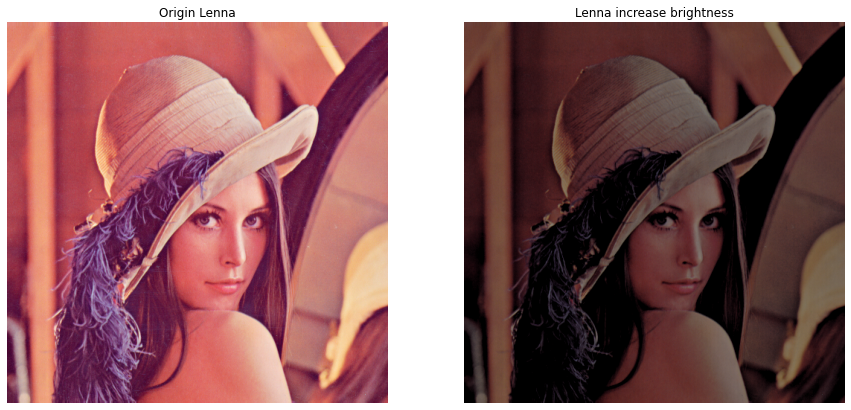

In [6]:
image = cv2.cvtColor(cv2.imread("images/Lenna.png"), cv2.COLOR_BGR2RGB)
image_brightness = change_brightness(image, -120)
cv2.imwrite("images/Lenna_brightness.png", cv2.cvtColor(image_brightness, cv2.COLOR_RGB2BGR))

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[0].set_title("Origin Lenna")
axarr[0].axis('off')

axarr[1].imshow(image_brightness)
axarr[1].set_title("Lenna increase brightness")
axarr[1].axis('off')

plt.show()

# Check equal

## MaxAbsScaler

In [7]:
os.popen("./main images/Chateau.png images/Chateau_CPU_0.png 0 256 0 8 1 1 8 1 1").read()
os.popen("./main images/Chateau.png images/Chateau_GPU_0.png 0 256 1 8 1 1 8 1 1").read()

os.popen("./main images/palais_garnier.jpg images/palais_garnier_CPU_0.jpg 0 256 0 8 1 1 8 1 1").read()
os.popen("./main images/palais_garnier.jpg images/palais_garnier_GPU_0.jpg 0 256 1 8 1 1 8 1 1").read()

print("Chateau_CPU:", hashlib.md5(open('images/Chateau_CPU_0.png','rb').read()).hexdigest())
print("Chateau_GPU:", hashlib.md5(open('images/Chateau_GPU_0.png','rb').read()).hexdigest())

print("palais_garnier_CPU:", hashlib.md5(open('images/palais_garnier_CPU_0.jpg','rb').read()).hexdigest())
print("palais_garnier_GPU:", hashlib.md5(open('images/palais_garnier_GPU_0.jpg','rb').read()).hexdigest())

Chateau_CPU: 7f698b2c308e2b3a4c2fb264f21360c7
Chateau_GPU: 7f698b2c308e2b3a4c2fb264f21360c7
palais_garnier_CPU: 8beee4e1cac3512c9ebb9f736b8e4a52
palais_garnier_GPU: 8beee4e1cac3512c9ebb9f736b8e4a52


## MinMaxScaler

In [8]:
os.popen("./main images/Chateau.png images/Chateau_CPU_1.png 1 256 0 8 1 1 8 1 1").read()
os.popen("./main images/Chateau.png images/Chateau_GPU_1.png 1 256 1 8 1 1 8 1 1").read()

os.popen("./main images/palais_garnier.jpg images/palais_garnier_CPU_1.jpg 1 256 0 8 1 1 8 1 1").read()
os.popen("./main images/palais_garnier.jpg images/palais_garnier_GPU_1.jpg 1 256 1 8 1 1 8 1 1").read()

print("Chateau_CPU:", hashlib.md5(open('images/Chateau_CPU_1.png','rb').read()).hexdigest())
print("Chateau_GPU:", hashlib.md5(open('images/Chateau_GPU_1.png','rb').read()).hexdigest())

print("palais_garnier_CPU:", hashlib.md5(open('images/palais_garnier_CPU_1.jpg','rb').read()).hexdigest())
print("palais_garnier_GPU:", hashlib.md5(open('images/palais_garnier_GPU_1.jpg','rb').read()).hexdigest())

Chateau_CPU: 7f698b2c308e2b3a4c2fb264f21360c7
Chateau_GPU: 7f698b2c308e2b3a4c2fb264f21360c7
palais_garnier_CPU: 23baaefcdc8477db735f9990630b5abc
palais_garnier_GPU: 23baaefcdc8477db735f9990630b5abc


# Visualize

## Chateau

<Figure size 1080x1152 with 0 Axes>

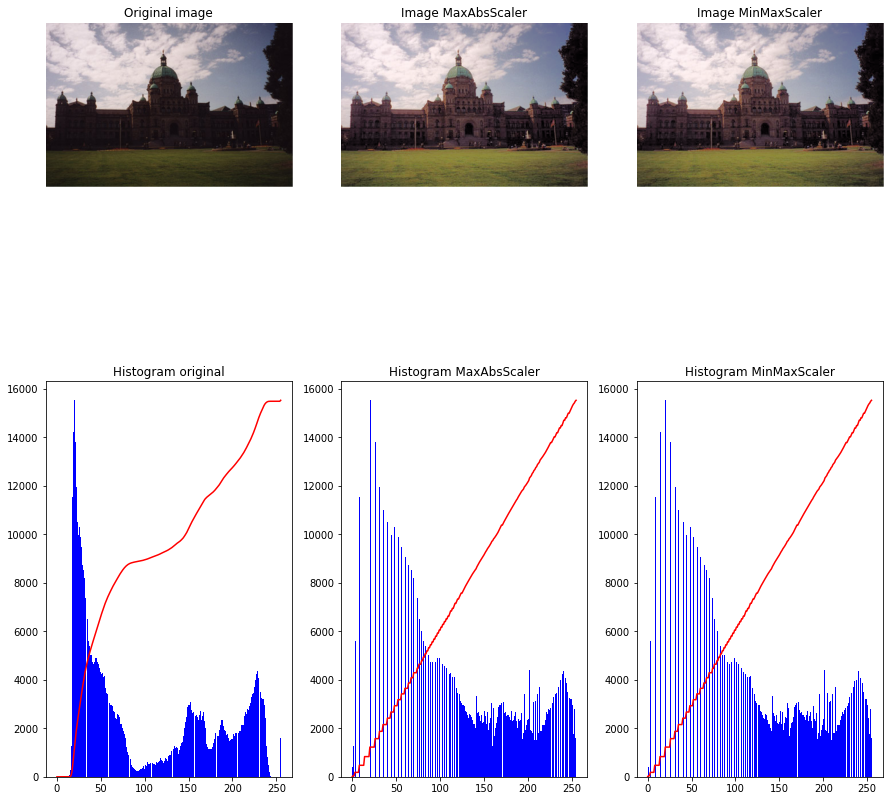

In [9]:
file = "images/Chateau.png"
fileMax = "images/Chateau_GPU_0.png"
fileMin = "images/Chateau_GPU_1.png"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

## palais garnier

<Figure size 1080x1152 with 0 Axes>

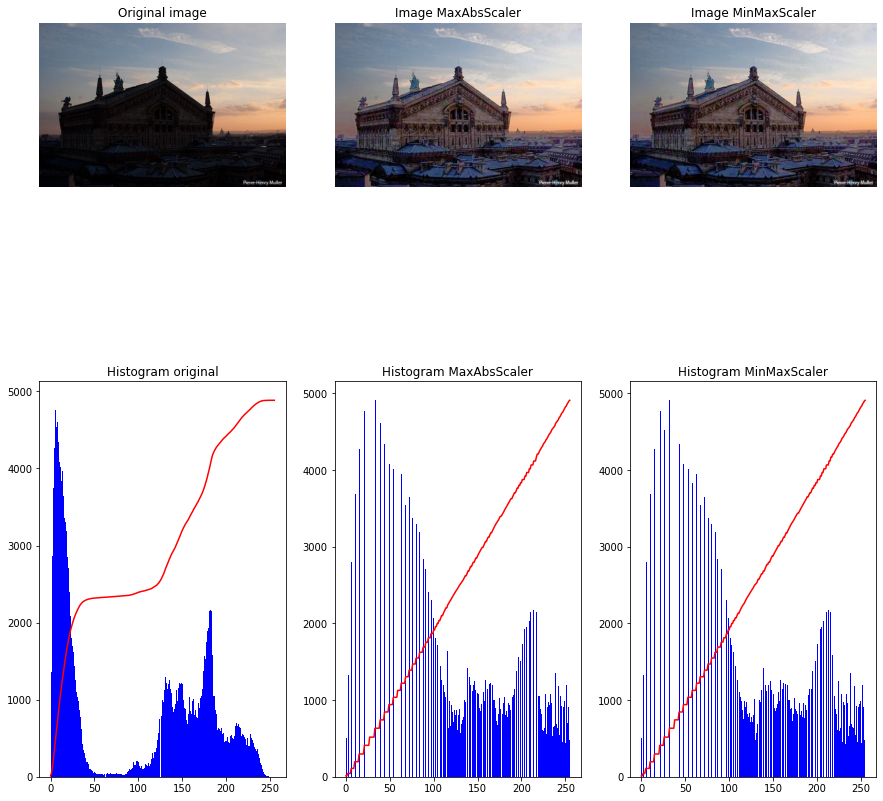

In [10]:
file = "images/palais_garnier.jpg"
fileMax = "images/palais_garnier_GPU_0.jpg"
fileMin = "images/palais_garnier_GPU_1.jpg"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

## Lenna

In [11]:
os.popen("./main images/Lenna_brightness.png images/Lenna_brightness_GPU_0.png 0 256 1 2 8 2 1 8 2").read()
os.popen("./main images/Lenna_brightness.png images/Lenna_brightness_GPU_1.png 1 256 1 2 8 2 1 8 2").read()

'5.13632\n'

<Figure size 1080x1152 with 0 Axes>

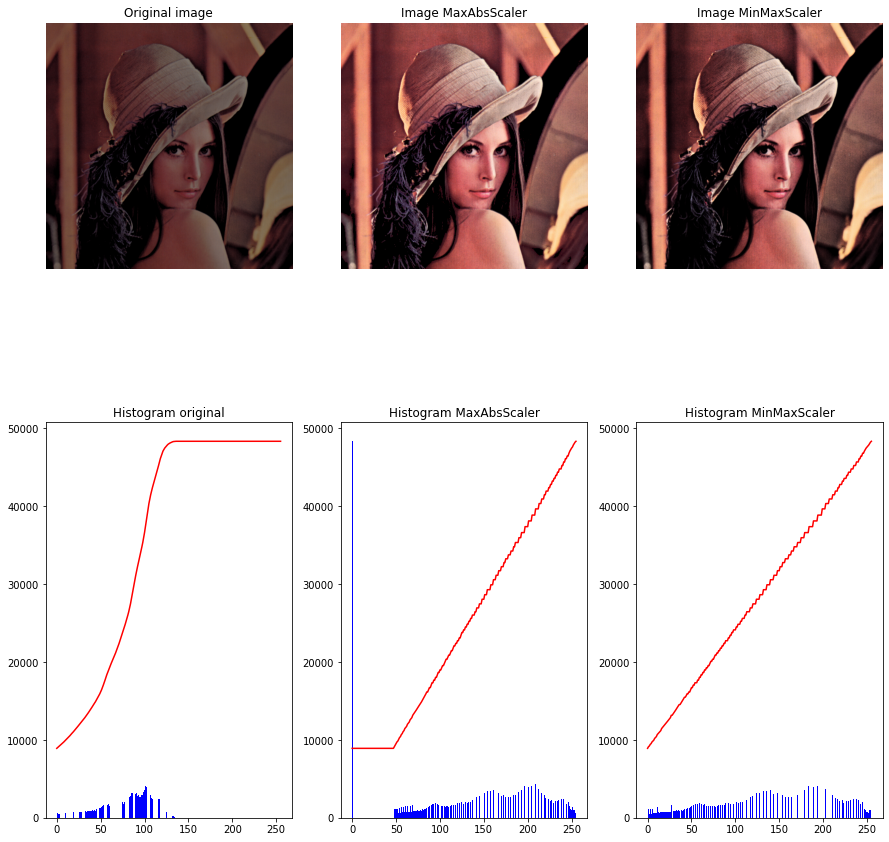

In [12]:
file = "images/Lenna_brightness.png"
fileMax = "images/Lenna_brightness_GPU_0.png"
fileMin = "images/Lenna_brightness_GPU_1.png"
plt.figure()
f, axarr = plt.subplots(2,3)

image = readImage(file)
axarr[0, 0].imshow(image)
axarr[0, 0].axis('off')
axarr[0, 0].set_title("Original image")

imageMax = readImage(fileMax)
axarr[0, 1].imshow(imageMax)
axarr[0, 1].axis('off')
axarr[0, 1].set_title("Image MaxAbsScaler")

imageMin = readImage(fileMin)
axarr[0, 2].imshow(imageMin)
axarr[0, 2].axis('off')
axarr[0, 2].set_title("Image MinMaxScaler")


vis = getVisualize(file)
axarr[1, 0].plot(vis[1][0], vis[1][1], color = 'red')
axarr[1, 0].hist(vis[0], bins=256, color = 'blue')
axarr[1, 0].set_title("Histogram original")

visMax = getVisualize(fileMax)
axarr[1, 1].plot(visMax[1][0], visMax[1][1], color = 'red')
axarr[1, 1].hist(visMax[0], bins=256, color = 'blue')
axarr[1, 1].set_title("Histogram MaxAbsScaler")

visMin = getVisualize(fileMin)
axarr[1, 2].plot(visMin[1][0], visMin[1][1], color = 'red')
axarr[1, 2].hist(visMin[0], bins=256, color = 'blue')
axarr[1, 2].set_title("Histogram MinMaxScaler")

plt.show()

In [13]:
thread_time = {}
times = 2
for gridDimx in [0, 5, 10]:
    for gridDimy in [0]:
        for gridDimz in [0, 4]:
            for blockDimx in [0, 3]:
                for blockDimy in [0, 2]:
                    for blockDimz in [0, 3]:
                        cmd = f"./main images/Chateau.png images/temp.png 1 256 1 {2**gridDimx} {2**gridDimy} {2**gridDimz} {2**blockDimx} {2**blockDimy} {2**blockDimz}"
                        result = timeCapture(cmd, times)
                        print("Command:", cmd, "Time:", result)
                        if (gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz) in thread_time:
                            thread_time[(gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz)] += result
                        else:
                            thread_time[(gridDimx+gridDimy+gridDimz+blockDimx+blockDimy+blockDimz)] = result

Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 1 1 Time: [1200.84, 1181.5]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 1 8 Time: [340.623, 341.701]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 4 1 Time: [510.055, 511.185]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 1 4 8 Time: [112.996, 112.114]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 1 1 Time: [338.924, 340.092]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 1 8 Time: [59.6523, 59.6276]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 4 1 Time: [112.169, 112.454]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 1 8 4 8 Time: [24.596, 24.6465]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 16 1 1 1 Time: [188.717, 188.515]
Command: ./main images/Chateau.png images/temp.png 1 256 1 1 1 16 1 1 8 Time: [28.1132, 28.1068]
Command: ./main images/Chateau.png image

In [14]:
time_cpu = timeCapture("./main images/Chateau.png images/temp.png 1 256 0", 5)

In [15]:
timeCapture("./main images/Chateau.png images/temp.png 1 256 0", 5)

[70.823, 70.529, 72.035, 69.677, 70.845]

In [16]:
x_threads = []
y_times = []
for k, v in sorted(thread_time.items(), key = lambda x:x[0]):
    print(f"Total threads: {k}\nTime: {v}(mean: {np.mean(v)})")
    x_threads.append(k)
    y_times.append(np.mean(v))

Total threads: 0
Time: [1200.84, 1181.5](mean: 1191.17)
Total threads: 2
Time: [510.055, 511.185](mean: 510.62)
Total threads: 3
Time: [340.623, 341.701, 338.924, 340.092](mean: 340.33500000000004)
Total threads: 4
Time: [188.717, 188.515](mean: 188.61599999999999)
Total threads: 5
Time: [112.996, 112.114, 112.169, 112.454, 101.473, 102.038](mean: 108.87400000000001)
Total threads: 6
Time: [59.6523, 59.6276, 54.2574, 54.1761](mean: 56.928349999999995)
Total threads: 7
Time: [28.1132, 28.1068, 28.987, 29.0459, 27.7818, 27.6386](mean: 28.27888333333333)
Total threads: 8
Time: [24.596, 24.6465, 14.9582, 15.2676, 14.9116, 14.9648](mean: 18.224116666666664)
Total threads: 9
Time: [9.20397, 9.13856, 9.98275, 10.0385, 16.6795, 16.7721](mean: 11.969229999999998)
Total threads: 10
Time: [5.76979, 5.75062, 5.40326, 5.3249, 5.35421, 5.3977, 17.1454, 17.6934](mean: 8.47991)
Total threads: 11
Time: [3.6807, 3.63859, 5.66813, 5.76346](mean: 4.6877200000000006)
Total threads: 12
Time: [4.00339, 3.864

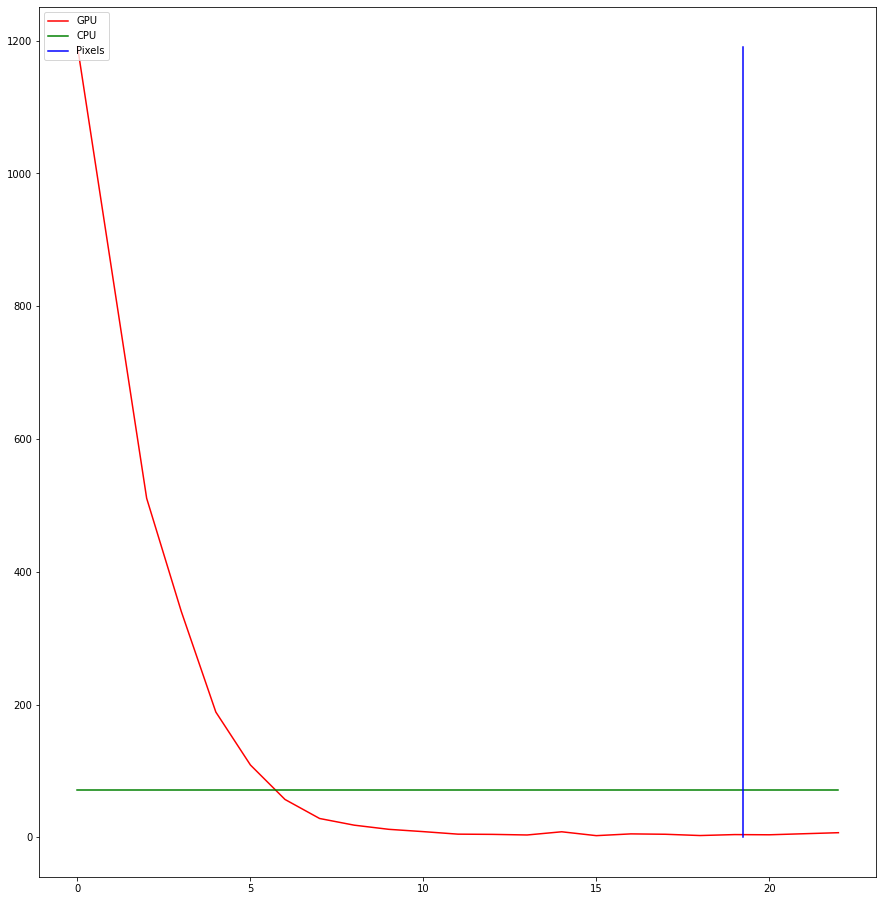

In [17]:
plt.plot(x_threads, y_times, color = 'red', label = "GPU")
plt.plot([0, max(x_threads)], [np.mean(time_cpu)]*2, color = "green", label = "CPU")
plt.plot([math.log2(961*640)]*2, [0, max(y_times)], color = 'blue', label = "Pixels")
plt.legend(loc="upper left")
plt.show()

In [20]:
times = 2
for gridDims in range(0, 12, 2):
    for blockDims in range(0, 10, 2):
        cmd = f"./main images/Chateau.png images/temp.png 1 256 1 {2**gridDims} 1 1 {2**blockDims} 1 1"
        result = timeCapture(cmd, times)
        print(gridDims, blockDims, "Time:", np.mean(result))

0 0 Time: 1182.085
0 2 Time: 510.87649999999996
0 4 Time: 199.363
0 6 Time: 58.718199999999996
0 8 Time: 22.81645
2 0 Time: 479.144
2 2 Time: 190.88
2 4 Time: 55.5032
2 6 Time: 16.0987
2 8 Time: 7.1299399999999995
4 0 Time: 187.47
4 2 Time: 53.25265
4 4 Time: 15.3262
4 6 Time: 5.39072
4 8 Time: 3.3015350000000003
6 0 Time: 53.00605
6 2 Time: 14.907
6 4 Time: 5.3539200000000005
6 6 Time: 3.2199999999999998
6 8 Time: 2.546145
8 0 Time: 20.2465
8 2 Time: 6.586365
8 4 Time: 3.0598400000000003
8 6 Time: 2.50571
8 8 Time: 2.3339999999999996
10 0 Time: 17.364
10 2 Time: 5.891665
10 4 Time: 2.94413
10 6 Time: 2.397955
10 8 Time: 2.3900449999999998
